# ¿Cuál es la mejor tarifa?

Trabajas como analista para el operador de telecomunicaciones Megaline. La empresa ofrece a sus clientes dos tarifas de prepago, Surf y Ultimate. El departamento comercial quiere saber cuál de las tarifas genera más ingresos para poder ajustar el presupuesto de publicidad.

Vas a realizar un análisis preliminar de las tarifas basado en una selección de clientes relativamente pequeña. Tendrás los datos de 500 clientes de Megaline: quiénes son los clientes, de dónde son, qué tarifa usan, así como la cantidad de llamadas que hicieron y los mensajes de texto que enviaron en 2018. Tu trabajo es analizar el comportamiento de los clientes y determinar qué tarifa de prepago genera más ingresos.

Para mi el proposito de este proyecto es lograr analizar los datos de la empresa de telecomunicaciones para lograr comprobar o recharzar las hipotesis con las que nos encontramos y de esta manera probar cual tarifa genera mas ingresos a pesar de sus diferencias. 
Mi plan para poder finalizar este proyecto con exito, es primeramente analizar los datos a simple vista, agregar las columnas o la info que necesito, asi como tambien eliminar informacion de ser necesario, para despues poder despues hacer el analisis estadistico y llegar a mis propias conclusiones. 


## Inicialización

In [1]:
# Cargar todas las librerías
import pandas as pd 
import numpy as np 
from math import factorial
from scipy import stats as st
import math as mt
from matplotlib import pyplot as plt
import seaborn as sns

## Cargar datos

In [2]:
# Carga los archivos de datos en diferentes DataFrames
calls = pd.read_csv('/datasets/megaline_calls.csv')
internet = pd.read_csv('/datasets/megaline_internet.csv') 
mensajes = pd.read_csv('/datasets/megaline_messages.csv')
plans = pd.read_csv('/datasets/megaline_plans.csv')
users = pd.read_csv('/datasets/megaline_users.csv')


## Preparar los datos

## Tarifas

In [3]:
# Imprime la información general/resumida sobre el DataFrame de las tarifas
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [4]:
# Imprime una muestra de los datos para las tarifas
plans.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


En esta seccion vemos que no hay ningun problema con la informacion, todo esta completo, no tenemos datos ausentes o duplicados y la informacion de las tarifas concuerda perfectamente con la dada antes de iniciar el proyecto, entonces en este primer dataframe vemos que todo esta en orden. Lo unico que podemos enriquecer es cambiar el formato de mb a gb. 

###  Enriquecer los datos

In [5]:
plans['mb_per_month_included']= plans['mb_per_month_included']/1024

## Usuarios/as

In [6]:
# Imprime la información general/resumida sobre el DataFrame de usuarios
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [7]:
# Imprime una muestra de datos para usuarios
users.head()

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN


### Corregir los datos

Aqui vamos a arreglar el formato de la columna reg_date para poderlo ver en fecha y tambien debemos cambiarle el nombre a la columna plan para que posteriormente nos haga match con el dataframe de plans

In [8]:
users['reg_date'] = pd.to_datetime(users['reg_date'], format='%Y-%m-%d')
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [9]:
users = users.rename(columns={'plan':'plan_name'})


## Llamadas

In [10]:
# Imprime la información general/resumida sobre el DataFrame de las llamadas

calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [11]:
# Imprime una muestra de datos para las llamadas
calls.head()

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22


En el dataframe de llamadas tampoco vemos datos ausentes o duplicados por lo que no hay que hacer mayores cambios, el unico dato que se puede enriquecer o cambiar es el formato de fechas y posterior agregar una nueva columna para el mes. 

### Corregir los datos

En esta seccion solo tenemos que transformalo a formato de fecha. 

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'], format='%Y-%m-%d')
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


### Enriquecer los datos

Aca vamos agregar una columna para el mes que nos ayudara proximente. Ademas vamos a redondear la duracion de las llamadas para poder tener datos mas acordes.

In [13]:
calls['month'] = calls['call_date'].dt.month
calls.head()

,id,user_id,call_date,duration,month
0,1000_93,1000,2018-12-27,8.52,12
1,1000_145,1000,2018-12-27,13.66,12
2,1000_247,1000,2018-12-27,14.48,12
3,1000_309,1000,2018-12-28,5.76,12
4,1000_380,1000,2018-12-30,4.22,12


In [14]:
calls['duration'] = np.ceil(calls['duration'])


## Mensajes

In [15]:
# Imprime la información general/resumida sobre el DataFrame de los mensajes

mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [16]:
# Imprime una muestra de datos para los mensajes
mensajes.head(20)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


Nuevamente en este dataframe tampoco nos encontramos con informacion incompleta como datos ausentes o duplicados, vemos que toda la informacion proporcionada esta bien, solamamente tenemos que arreglar el formato de fecha. 

### Corregir los datos

Aca vamos a corregir el formato de message_date para que se muestre como fecha. 

In [17]:
mensajes['message_date'] = pd.to_datetime(mensajes['message_date'],format='%Y-%m-%d')
mensajes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   id            76051 non-null  object        
 1   user_id       76051 non-null  int64         
 2   message_date  76051 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 1.7+ MB


### Enriquecer los datos

Aca vamos agregar una columna del mes para tener la informacion mas detallada.

In [18]:
mensajes_meses = mensajes['month'] = mensajes['message_date'].dt.month
mensajes.head()

,id,user_id,message_date,month
0,1000_125,1000,2018-12-27,12
1,1000_160,1000,2018-12-31,12
2,1000_223,1000,2018-12-31,12
3,1000_251,1000,2018-12-27,12
4,1000_255,1000,2018-12-26,12


## Internet

In [19]:
# Imprime la información general/resumida sobre el DataFrame de internet

internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [20]:
# Imprime una muestra de datos para el tráfico de internet
internet.head(20)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


En este dataframe podemos ver que no tenemos informacion incompleta, aca lo unico que se podria arreglar es cambiar el formato de la fecha para que se muestre bien y de esa manera poder sacar una columna nueva para el mes que nos ayudara mas adelante y tambien podemos corregir los datos de mb a gb para poder mostrar correctamente la informacion segun el plan que escogieron los usuarios. 

### Corregir los datos

Aca vamos a corregir el formato de la columna session_date para poder verla en fecha. 

In [21]:
internet['session_date'] = pd.to_datetime(internet['session_date'], format='%Y-%m-%d')
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   id            104825 non-null  object        
 1   user_id       104825 non-null  int64         
 2   session_date  104825 non-null  datetime64[ns]
 3   mb_used       104825 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 3.2+ MB


### Enriquecer los datos

En esta seccion vamos agregar una columna con los datos del mes y tambien vamos agregar una columna para pasar de mb a gb.

In [22]:
internet_mes = internet['month'] = internet['session_date'].dt.month
internet.head()

,id,user_id,session_date,mb_used,month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12


In [23]:
internet['mb_used']= internet['mb_used']/1024
internet['mb_used']

0         0.087754
1         0.000000
2         0.644922
3         0.264639
4         0.859590
            ...   
104820    0.212949
104821    0.297578
104822    0.285889
104823    0.000000
104824    0.740537
Name: mb_used, Length: 104825, dtype: float64

## Estudiar las condiciones de las tarifas

In [24]:
# Imprime las condiciones de la tarifa y asegúrate de que te quedan claras
plans

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15.0,500,20,10,0.03,0.03,surf
1,1000,30.0,3000,70,7,0.01,0.01,ultimate


In [25]:
# Calcula el número de llamadas hechas por cada usuario al mes. Guarda el resultado.
monthly_calls = calls.groupby(['user_id','month'])['id'].count().reset_index()
monthly_calls.rename(columns={'id':'calls_made'},inplace=True)
print(monthly_calls.head(20))

    user_id  month  calls_made
0      1000     12          16
1      1001      8          27
2      1001      9          49
3      1001     10          65
4      1001     11          64
5      1001     12          56
6      1002     10          11
7      1002     11          55
8      1002     12          47
9      1003     12         149
10     1004      5          21
11     1004      6          44
12     1004      7          49
13     1004      8          49
14     1004      9          42
15     1004     10          61
16     1004     11          54
17     1004     12          50
18     1005     12          59
19     1006     11           2


In [26]:
# Calcula la cantidad de minutos usados por cada usuario al mes. Guarda el resultado.
monthly_min = calls.groupby(['user_id','month'])['duration'].sum().reset_index()
monthly_min.rename(columns={'duration':'duration_mins'},inplace=True)
print(monthly_min.head(20))

    user_id  month  duration_mins
0      1000     12          124.0
1      1001      8          182.0
2      1001      9          315.0
3      1001     10          393.0
4      1001     11          426.0
5      1001     12          412.0
6      1002     10           59.0
7      1002     11          386.0
8      1002     12          384.0
9      1003     12         1104.0
10     1004      5          193.0
11     1004      6          275.0
12     1004      7          381.0
13     1004      8          354.0
14     1004      9          301.0
15     1004     10          365.0
16     1004     11          476.0
17     1004     12          427.0
18     1005     12          496.0
19     1006     11           10.0


In [27]:
# Calcula el número de mensajes enviados por cada usuario al mes. Guarda el resultado.
monthly_sms= mensajes.groupby(['user_id', 'month'])['id'].count().reset_index()
monthly_sms.rename(columns={'id':'sms_used'},inplace=True)
print(monthly_sms)

      user_id  month  sms_used
0        1000     12        11
1        1001      8        30
2        1001      9        44
3        1001     10        53
4        1001     11        36
...       ...    ...       ...
1801     1496      9        21
1802     1496     10        18
1803     1496     11        13
1804     1496     12        11
1805     1497     12        50

[1806 rows x 3 columns]


In [28]:
# Calcula el volumen del tráfico de Internet usado por cada usuario al mes. Guarda el resultado.
monthly_internet = internet.groupby(['user_id', 'month'])['mb_used'].sum().reset_index()
monthly_internet['mb_used'] = np.ceil(monthly_internet['mb_used'])

In [29]:
# Fusiona los datos de llamadas, minutos, mensajes e Internet con base en user_id y month
fusion_calls = monthly_calls.merge(monthly_sms ,on=['user_id','month'], how='outer')
fusion_min = fusion_calls.merge(monthly_min, on=['user_id', 'month'],how='outer')
fusion_internet = fusion_min.merge(monthly_internet, on=['user_id','month'],how='outer')


In [30]:
# Añade la información de la tarifa
fusion_plans = plans.merge(users, on='plan_name')
total_info = fusion_plans.merge(fusion_internet, on='user_id')
total_info = total_info.fillna(0)

In [51]:
# Calcula el ingreso mensual para cada usuario
total_info['total_info_sms'] =total_info['sms_used']-total_info['messages_included'] 
total_info['total_info_sms'] = total_info['total_info_sms'].apply(lambda x:max (x,0))
total_info['price_sms'] = total_info['total_info_sms'] * total_info['usd_per_message']
total_info['total_info_calls']= total_info['calls_made']-total_info['minutes_included']
total_info['total_info_calls']= total_info['total_info_calls'].apply(lambda x:max (x,0))
total_info['price_calls'] = total_info['total_info_calls'] * total_info['usd_per_minute']
total_info['total_info_mins'] = total_info['duration_mins'] - total_info['minutes_included']
total_info['total_info_mins'] = total_info['total_info_mins'].apply(lambda x:max (x,0))
total_info['price_duration'] = total_info['total_info_mins'] * total_info['usd_per_minute']
total_info['total_info_gb'] = total_info['mb_used'] - total_info['mb_per_month_included']
total_info['total_info_gb'] = total_info['total_info_gb'].apply(lambda x:max (x,0))
total_info['price_gb'] = total_info['total_info_gb'] * total_info['usd_per_gb']
total_info['total_price'] = total_info['price_sms']+total_info['price_calls']+total_info['price_duration']+total_info['price_gb']+total_info['usd_monthly_pay']
total_info.head()

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name,user_id,first_name,...,mb_used,total_info_sms,price_sms,total_info_calls,price_calls,total_info_mins,price_duration,total_info_gb,price_gb,total_price
0,50,15.0,500,20,10,0.03,0.03,surf,1001,Mickey,...,7.0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,20.00
1,50,15.0,500,20,10,0.03,0.03,surf,1001,Mickey,...,14.0,0.0,0.00,0,0.0,0.0,0.0,0.0,0.0,20.00
2,50,15.0,500,20,10,0.03,0.03,surf,1001,Mickey,...,22.0,3.0,0.09,0,0.0,0.0,0.0,7.0,70.0,90.09
3,50,15.0,500,20,10,0.03,0.03,surf,1001,Mickey,...,19.0,0.0,0.00,0,0.0,0.0,0.0,4.0,40.0,60.00
4,50,15.0,500,20,10,0.03,0.03,surf,1001,Mickey,...,19.0,0.0,0.00,0,0.0,0.0,0.0,4.0,40.0,60.00


## Estudia el comportamiento de usuario

### Llamadas

In [32]:
# Compara la duración promedio de llamadas por cada plan y por cada mes. Traza un gráfico de barras para visualizarla.
info_calls = total_info.groupby(['plan_name','month'])['duration_mins'].mean().reset_index()
info_calls.head()

,plan_name,month,duration_mins
0,surf,1,203.000000
1,surf,2,297.000000
2,surf,3,330.000000
3,surf,4,351.540000
4,surf,5,399.584416


<AxesSubplot:xlabel='month', ylabel='duration_mins'>

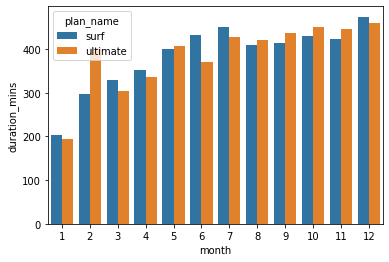

In [33]:
sns.barplot(data=info_calls,x='month', y='duration_mins', hue='plan_name')

<AxesSubplot:xlabel='duration_mins', ylabel='Count'>

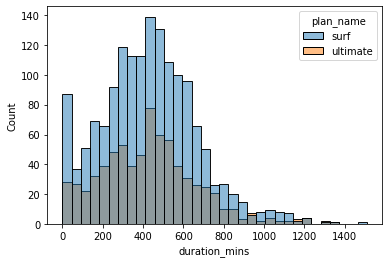

In [34]:
# Compara el número de minutos mensuales que necesitan los usuarios de cada plan. Traza un histograma.

sns.histplot(data=total_info, x='duration_mins', hue='plan_name')

In [35]:
# Calcula la media y la varianza de la duración mensual de llamadas.
total_info.groupby('plan_name')['duration_mins'].agg(["mean", "var"])

,mean,var
plan_name,,
surf,428.749523,54968.279461
ultimate,430.450000,57844.464812


<AxesSubplot:xlabel='plan_name', ylabel='duration_mins'>

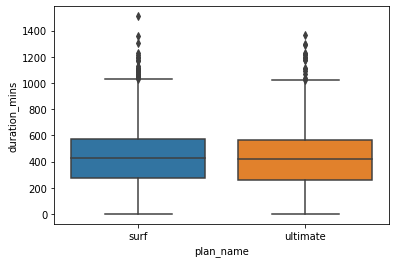

In [36]:
# Traza un diagrama de caja para visualizar la distribución de la duración mensual de llamadas
sns.boxplot(data=total_info, x='plan_name',y='duration_mins')

Podemos notar que no existe una mayor diferencia entre las duracion de las llamadas en los dos diferentes planes, sin embargo en el grafico de barras podemos ver que hay una diferencia significativa en los primeros 3 veces en donde los usuarios del plan ultimate si utilizaron mas minutos que los del plan surf pero en el momento de sacar tanto la media como la varianza se nota que esas diferencias en algunos meses no marcan tanto un nivel de desigualdad entre los dos planes.

### Mensajes

<AxesSubplot:xlabel='month', ylabel='sms_used'>

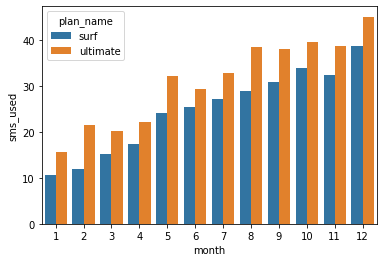

In [37]:
# Comprara el número de mensajes que tienden a enviar cada mes los usuarios de cada plan
info_sms = total_info.groupby(['plan_name', 'month'])['sms_used'].mean().reset_index()

sns.barplot(data=info_sms,x='month', y='sms_used', hue='plan_name')

<AxesSubplot:xlabel='sms_used', ylabel='Count'>

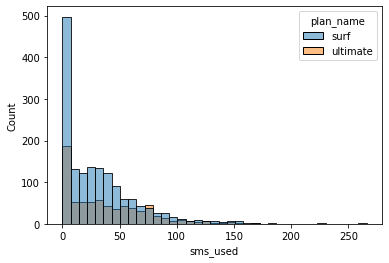

In [38]:
sns.histplot(data=total_info, x='sms_used', hue='plan_name')

In [39]:
total_info.groupby('plan_name')['sms_used'].agg(["mean", "var"])

,mean,var
plan_name,,
surf,31.159568,1126.724522
ultimate,37.551389,1208.756744


<AxesSubplot:xlabel='plan_name', ylabel='sms_used'>

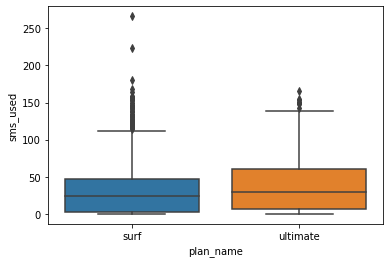

In [40]:
sns.boxplot(data=total_info, x='plan_name',y='sms_used')

Con respecto a los mensajes, si podemos ver un poco de diferencia entre los dos planes pero se debe a que los usuarios del plan ultimate tienen el doble de mensajes agregados que el plan surf por lo que podemos ver la difrenceia con respecto al promedio de mensajes que envian.

### Internet

<AxesSubplot:xlabel='month', ylabel='mb_used'>

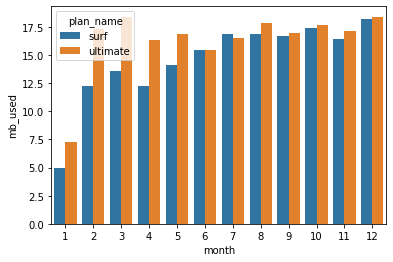

In [41]:
# Compara la cantidad de tráfico de Internet consumido por usuarios por plan
info_internet = total_info.groupby(['plan_name','month'])['mb_used'].mean().reset_index()
info_internet.head()

sns.barplot(data=info_internet,x='month', y='mb_used', hue='plan_name')

<AxesSubplot:xlabel='mb_used', ylabel='Count'>

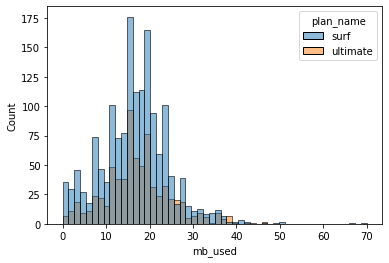

In [42]:
sns.histplot(data=total_info, x='mb_used', hue='plan_name')

In [43]:
total_info.groupby('plan_name')['mb_used'].agg(["mean", "var"])

,mean,var
plan_name,,
surf,16.670693,61.58360
ultimate,17.306944,58.83055


<AxesSubplot:xlabel='plan_name', ylabel='mb_used'>

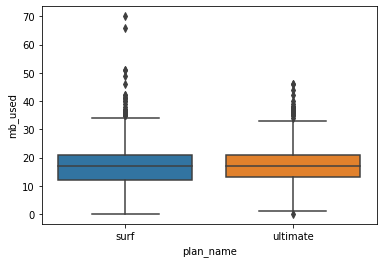

In [44]:
sns.boxplot(data=total_info, x='plan_name',y='mb_used')

Como conclusion en el consumo de internet de los usuarios de ambos planes, se puede ver que en promedio utilizan una cantidad muy similar de gb , hay algunos casos atipicos en los que se muestra que los usuarios del plan ultimate usan mas gb de internet pero esto tambien tiene que ver con el hecho de que tienen mas gb disponibles para usar que los del plan surf. 

## Ingreso

<AxesSubplot:xlabel='month', ylabel='total_price'>

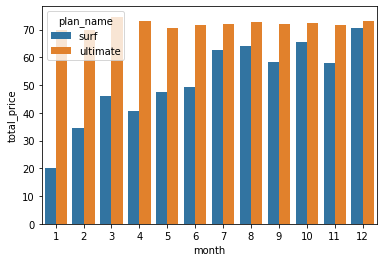

In [45]:
info_price = total_info.groupby(['plan_name','month'])['total_price'].mean().reset_index()
info_price.head()
sns.barplot(data=info_price,x='month', y='total_price', hue='plan_name')

<AxesSubplot:xlabel='total_price', ylabel='Count'>

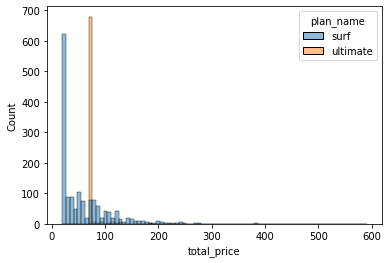

In [46]:
sns.histplot(data=total_info, x='total_price', hue='plan_name')

In [47]:
total_info.groupby('plan_name')['total_price'].agg(["mean", "var"])

,mean,var
plan_name,,
surf,60.706408,3067.835152
ultimate,72.313889,129.848486


<AxesSubplot:xlabel='plan_name', ylabel='total_price'>

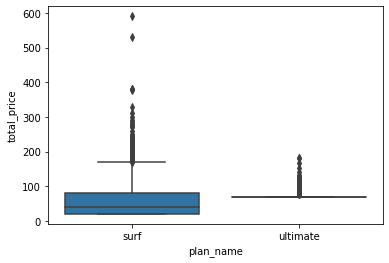

In [48]:
sns.boxplot(data=total_info, x='plan_name',y='total_price')

En lo que respecta al ingreso si se puede ver una diferencia mas marcada entre lo que generan los dos planes, esto porque el plan ultimate es mucho mas costoso que el plan surf y aunque los usuarios del plan surf se pueden pasar un poco en el consumo de sus datos igual vemos que el plan ultimate si deja mas ingresos.

## Prueba las hipótesis estadísticas

In [49]:
# Prueba las hipótesis

income_surf = total_info[total_info['plan_name']=='surf']['total_price']
income_ultimate = total_info[total_info['plan_name']=='ultimate']['total_price']

display(income_surf.var())
display(income_ultimate.var())
alpha = 0.05 

results= st.ttest_ind(income_surf, income_ultimate, equal_var=False)


print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 

3067.835152293878

129.8484855509195

valor p:  3.17039054811355e-15
Rechazamos la hipótesis nula


Con esto prueba de hipotesis podemos ver que si difieren los ingresos de ambos planes. 

In [50]:
# Prueba las hipótesis
ny_nj_income = total_info[total_info['city'].str.contains('NY-NJ')]['total_price']
not_ny_nj_income = total_info[~(total_info['city'].str.contains('NY-NJ'))]['total_price']

display(ny_nj_income.var())
display(not_ny_nj_income.var())
alpha=0.5

results= st.ttest_ind(ny_nj_income,not_ny_nj_income , equal_var=False)


print('valor p: ', results.pvalue) # extraer el valor p

if results.pvalue < alpha: # comparar el valor p con el umbral
    print("Rechazamos la hipótesis nula")
else:
    print("No podemos rechazar la hipótesis nula") 

1895.5456899204246

2225.0479943518917

valor p:  0.03352561588530014
Rechazamos la hipótesis nula


Con la prueba de esta hipotesis tambien podemos ver que fue rechazada por lo que si existe una diferencia entre los ingresos de NY-NJ en comparacion con las otras cuidades.

Como conclusion final tenemos que:
1. Si existen muchas diferencias entre los usuarios de ambos planes ya que tambien vemos muy marcada la diferencia en la cantidad de datos que incluyen los planes, por lo que cuando comparamos la catidad de llamadas,mensajes,internet pudimos descubrir que los usuarios del plan ultimate gastan mucho mas sus datos en general. 
2. Que los usuarios del plan surf la mayoria de veces se exceden del limte de mensajes o llamadas que tienen y esto hace que no haya una mayor diferencia en promedio entre los dos planes. 
3. En general podemos probar que el plan que genera mas ingresos sigue siendo el de ultimate debido a su gran diferencia de precios con el plan surf y que aunque los usuarios de este mismo se suelen exceder nunca van a llegar a pagar tanto como los del plan ultimate, es por eso que en definitiva el plan ultimate es el que mas ingresos genera a la empresa Megaline.